In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dlr = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True) # 압축된 파일을 풀어서 데이터를 가져와라
data_dlr = pathlib.Path(data_dlr)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
image_count = len(list(data_dlr.glob('*/*.jpg')))
# 디렉토리/파일이름.jpg에서 데이터를 가져와서 list로 만들고, 개수 구하기
print(image_count)

3670


In [4]:
 batch_size = 32
 img_height = 180
 img_width =180

In [7]:
# train과 validate로 나눠서 진행!
train_ds = tf.keras.preprocessing.image_dataset_from_directory( # 각 folder별로 데이터가 분리되어있을 경우에 사용
    data_dlr, # 폴더
    validation_split=0.2,
    subset = "training",
    image_size=(img_height, img_width), # 튜플 형태로 자료 구조로 구성시켜줬다.
    seed = 1, # 매번 실행할 때마다 동일한 데이터의 구성, 배치 순서를 유지하기 위해서 특정 숫자로 seed를 정의했다.
    batch_size = batch_size

)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dlr,
    validation_split=0.2,
    subset = "validation",
    image_size=(img_height, img_width),
    seed = 1,
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
# 정의를 따로 하려고했으나, 처음 받아올 때 이미 정의된 상태였기 때문에 그냥 쓰면 된다.
class_name = train_ds.class_names
print(class_name)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


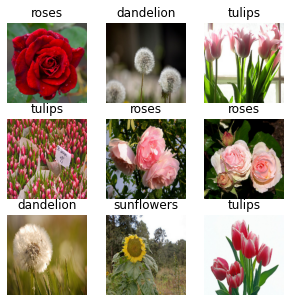

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for images, labels in train_ds.take(1): # train dataset에서 하나를 가져와라
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off") # 축은 필요가 없다

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [14]:
num_classes =5

model = Sequential(
    [
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
  # layer과정에서 normalization한 것이다.
  # input_size를 재설정해줬으며(180x180,3채널) 255로 나눠준다.
  layers.Conv2D(16,3,padding='same', activation='relu'),
  layers.MaxPooling2D(), # size -> 1/2
  layers.Conv2D(32,3,padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,3,padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  
  layers.Dense(num_classes)
]
)

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [17]:
epochs =10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
) 

Epoch 1/10
92/92 [==============================] - 18s 66ms/step - loss: 1.3349 - accuracy: 0.4261 - val_loss: 1.1589 - val_accuracy: 0.4973
Epoch 2/10
92/92 [==============================] - 6s 60ms/step - loss: 1.0760 - accuracy: 0.5657 - val_loss: 1.0905 - val_accuracy: 0.5681
Epoch 3/10
92/92 [==============================] - 6s 61ms/step - loss: 0.9093 - accuracy: 0.6488 - val_loss: 0.9500 - val_accuracy: 0.6635
Epoch 4/10
92/92 [==============================] - 6s 60ms/step - loss: 0.7766 - accuracy: 0.7176 - val_loss: 0.9234 - val_accuracy: 0.6649
Epoch 5/10
92/92 [==============================] - 6s 60ms/step - loss: 0.6312 - accuracy: 0.7677 - val_loss: 1.0088 - val_accuracy: 0.6431
Epoch 6/10
92/92 [==============================] - 7s 76ms/step - loss: 0.4976 - accuracy: 0.8202 - val_loss: 1.0469 - val_accuracy: 0.6471
Epoch 7/10
92/92 [==============================] - 7s 74ms/step - loss: 0.3727 - accuracy: 0.8719 - val_loss: 1.1932 - val_accuracy: 0.6662
Epoch 8/10
9

### 정확도, loss에 대한 수치 학습에 대해서 수치적으로(시각적으로) 확인해보자

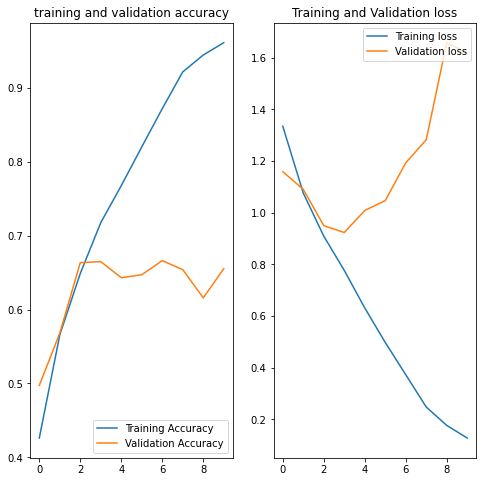

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label='Training Accuracy')
plt.plot(epochs_range,val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training loss')
plt.plot(epochs_range, val_loss, label= 'Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

2번째 epoch부터 overfitting이 발생한 것을 확인할 수 있었다. -> overfitting을 해결할 수 있는 방안?

In [27]:
sunflower_url = "http://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size = (img_height, img_width)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0 )

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "이 이미지는 {}에 {:.2f}만큼 제일 근접해서 속한다.".format(class_name[np.argmax(score)], 100*np.max(score))
)

이 이미지는 sunflowers에 99.48만큼 제일 근접해서 속한다.


## Data augmentation

layer에 data_augmentation을 추가한 것이다.

In [28]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

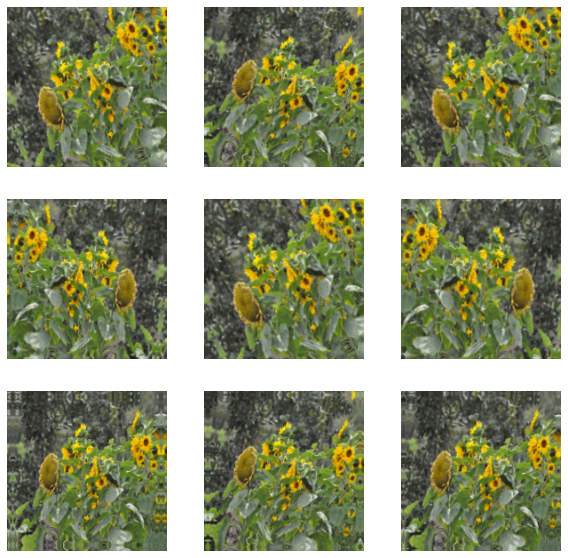

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [30]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## BatchNormalization & Dropout

In [36]:
num_classes = 5

model = Sequential([
  data_augmentation,

  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  # 원래 형태는  Conv2D activation함수를 진행하지않고, 배치 정규화를 진행하고 따로 activation 함수를 추가하는 것이 맞다.
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),

  layers.Dense(num_classes)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_2 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)       

In [34]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 9s 74ms/step - loss: 2.5375 - accuracy: 0.3409 - val_loss: 1.5967 - val_accuracy: 0.1935
Epoch 2/20
92/92 [==============================] - 6s 65ms/step - loss: 1.3360 - accuracy: 0.4210 - val_loss: 1.5026 - val_accuracy: 0.3065
Epoch 3/20
92/92 [==============================] - 7s 77ms/step - loss: 1.2830 - accuracy: 0.4332 - val_loss: 1.4621 - val_accuracy: 0.3774
Epoch 4/20
92/92 [==============================] - 6s 66ms/step - loss: 1.2535 - accuracy: 0.4533 - val_loss: 1.3335 - val_accuracy: 0.4319
Epoch 5/20
92/92 [==============================] - 7s 67ms/step - loss: 1.2155 - accuracy: 0.4704 - val_loss: 1.2446 - val_accuracy: 0.4850
Epoch 6/20
92/92 [==============================] - 7s 73ms/step - loss: 1.1888 - accuracy: 0.5017 - val_loss: 1.1548 - val_accuracy: 0.5368
Epoch 7/20
92/92 [==============================] - 7s 68ms/step - loss: 1.1422 - accuracy: 0.5290 - val_loss: 1.2354 - val_accuracy: 0.4918
Epoch 8/20
92

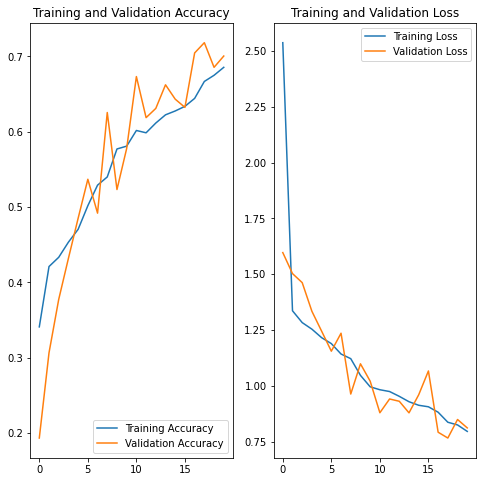

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

epoch을 100으로 진행하면 더 알기 쉽지않을까?